In [1]:
import numpy as np
import scipy.special as sp
from mpmath import hyp1f2, hyp2f2
import mpmath
import astropy.units as u
import astropy.constants as const
from astropy import cosmology

from numpy import power, exp, sqrt, pi
import matplotlib.pyplot as plt

Investivating how $j_n/\beta$ behaves numerically

In [3]:
# sp.spherical_jn(m+1, kthing * 2)

${\cal C}(\beta\Delta,\gamma=\beta\Delta,M,m;l)$

In [136]:
@np.vectorize
def _Cgammathingy(bD, M, m, l):
    x = bD*l
    t1 = (
         exp(1j*x) * sp.spherical_jn(m+1,x) / power(bD, m+1)
    )
    t2 = sqrt(pi) / power(2,m+2) * power(rhoES, m+1) / sp.gamma(m+2.5)
    t3 = (1j*x) / (M+m+2) * hyp2f2(m+2, m+M+2, 2*m+4, m+M+3, 2j * x)
    t4 = (2*m**2+6*m-M+5) / (M+m+1) * hyp2f2(m+2,m+M+1, 2*m+4, m+M+2, 2j*x)
    
    return (t1 - t2 * (t3 - t4))

# /def

@np.vectorize
def Cgammathingy(bD, M, m, l):
    """Docstring.
    """

    return _Cgammathingy(bD, M, m, rhoES=l+1) - power(l / (l+1), M) _Cgammathingy(bD, M, m, rhoES=l)


In [137]:
cosmo = cosmology.Planck18

zeq = cosmo.Om0 / cosmo.Ogamma0
aeq = 1 / (1 + zeq)
lambda0 = (const.c / cosmo.H0 * sqrt(8 * aeq / cosmo.Om0)).to(u.Mpc)
lambda0

<Quantity 297.43263179 Mpc>

In [138]:
kmag, thetaks = 1/100 * (cosmo.h/u.Mpc), 45 * u.deg

beta = (kmag * lambda0 * np.cos(thetaks)).to_value()
beta

1.4230023245628196

In [153]:
# rho0 ranges from 
rho0O = np.sqrt((1 + 1 / aeq) / 2)
print(rho0O)
N = 50
Delta = rho0O / N
Delta

53.545799554020036


1.0709159910804007

In [154]:
beta * Delta

1.523915944718906

<ipython-input-136-1f42b66f73b1>:5: RuntimeWarning: invalid value encountered in cdouble_scalars
  exp(1j*x) * sp.spherical_jn(m+1,x) / power(bD, m+1)


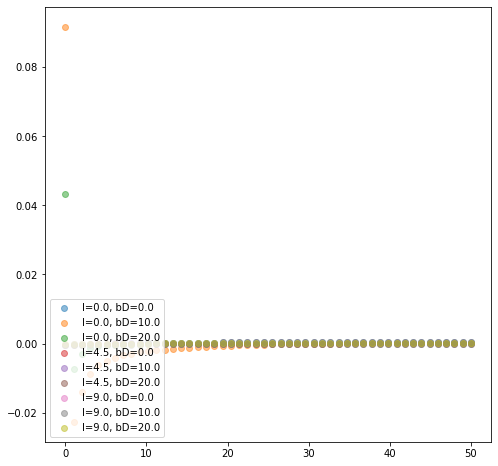

In [140]:
m = 0
M = np.linspace(m, m+50)

plt.figure(figsize=(8, 8))
for L in np.linspace(0, int(rho0O / Delta)-1, num=3):
    for bD in np.linspace(0, 20, num=3):
        ys = Cgammathingy(bD, M, m, L)
        plt.scatter(M, [np.float128(y.real) for y in ys],
                    label=f"l={L}, bD={bD}",
                    alpha=0.5)

# plt.yscale("log")
plt.legend(loc='lower left', fontsize=10)
plt.show();

In [8]:
%%time

mmin, mmax = 0, 30
lmin, lmax = 0, int(rho0O / Delta) - 1
Mmin, Mmax = 0, 100  # more derived
lgrid, mgrid, Mgrid = np.mgrid[lmin:lmax, mmin:mmax, Mmin:Mmax]

Cs = vec_Cgammathingy(beta * Delta, Mgrid, mgrid, lgrid)
correctedCs = Cs / sp.factorial(mgrid) / np.power(2, mgrid) / sp.factorial(Mgrid)

CPU times: user 5min 24s, sys: 716 ms, total: 5min 25s
Wall time: 5min 26s


In [195]:
correctedCs.shape

(9, 30, 100)

In [130]:
np.savez_compressed("testsaveC.npz", correctedCs)

In [106]:
%%timeit
Cgammathingy(beta * Delta, Mmax, mmax, lmax)

41.7 ms ± 811 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [165]:
# x = np.linspace(40, 42, num=10000)

# plt.scatter(x, [hyp1f2(10, 5, 6, _x) for _x in x], label="10,5,6")
# plt.scatter(x, [hyp1f2(3, 2, 3, _x) for _x in x], label="3,2,3")
# plt.yscale("log")

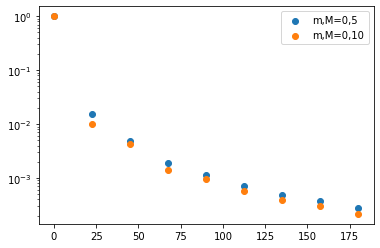

In [175]:
l = np.arange(0, N-1)
x = 2j * beta * Delta * l

plt.scatter(np.abs(x), [float(np.abs(hyp2f2(2, 6, 4, 7, _x))) for _x in x], label="m,M=0,5")
plt.scatter(np.abs(x), [float(np.abs(hyp2f2(2, 11, 4, 12, _x))) for _x in x], label="m,M=0,10")
plt.scatter(np.abs(x), [float(np.abs(hyp2f2(2, 11, 4, 12, _x))) for _x in x], label="m,M=0,10")
plt.yscale("log")
plt.legend();
plt.show()

In [ ]:
l = np.arange(0, N-1)
x = 2j * beta * Delta * l

plt.scatter(np.abs(x), [float(np.abs(hyp2f2(2, 6, 4, 7, _x))) for _x in x], label="m,M=0,5")
plt.scatter(np.abs(x), [float(np.abs(hyp2f2(2, 11, 4, 12, _x))) for _x in x], label="m,M=0,10")
plt.yscale("log")
plt.legend();
plt.show()

In [181]:
l = np.arange(0, N-1)
x = 2j * beta * Delta * l

# plt.scatter(np.abs(x), [float(np.abs(hyp2f2(2, 6, 4, 7, _x))) for _x in x], label="m,M=0,5")
# plt.scatter(np.abs(x), [float(np.abs(hyp2f2(2, 11, 4, 12, _x))) for _x in x], label="m,M=0,10")
# plt.yscale("log")
# plt.legend();
# plt.show()
np.abs(vec_Cgammathingy(beta*Delta, M=5, m=0, l=l))

array([mpf('0.010180591324034937'), mpf('0.10733503118127724'),
       mpf('0.45261752243769793'), mpf('1.1574707846711176'),
       mpf('4.6486293393482372'), mpf('4.7158087116393288'),
       mpf('18.177639150353915'), mpf('21.527467485470417'),
       mpf('42.791947102628647')], dtype=object)

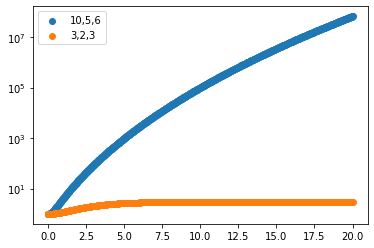

In [171]:
x = np.linspace(0, 20, num=1000) * 1j

plt.scatter(np.abs(x), [float(np.abs(hyp2f2(10, 18, 5, 6, _x))) for _x in x], label="10,5,6")
plt.scatter(np.abs(x), [float(np.abs(hyp2f2(3, 2, 4, 1, _x))) for _x in x], label="3,2,3")
plt.yscale("log")
plt.legend();
plt.show()

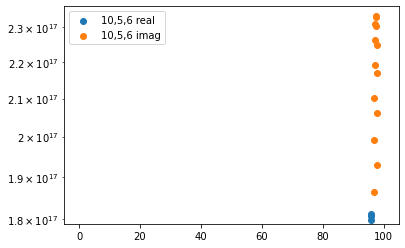

In [166]:
x = np.linspace(0, 100, num=1000) * 1j
y = [hyp2f2(10, 18, 5, 6, _x) for _x in x]

plt.scatter(np.abs(x), [float(_y.real) for _y in y], label="10,5,6 real")
plt.scatter(np.abs(x), [float(_y.imag) for _y in y], label="10,5,6 imag")
plt.yscale("log")
plt.legend();
plt.show()

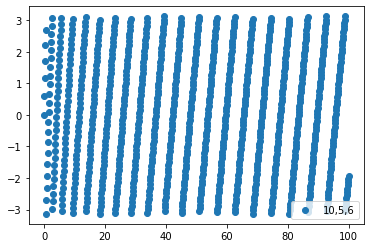

In [168]:
x = np.linspace(0, 100, num=1000) * 1j

plt.scatter(np.abs(x), [float(mpmath.arg(hyp2f2(10, 18, 5, 6, _x))) for _x in x], label="10,5,6")
# plt.yscale("log")
plt.legend();
plt.show()

In [157]:
x = np.linspace(0, 100, num=1000) * 1j
y = [hyp2f2(10, 18, 5, 6, _x) for _x in x]

plt.scatter(np.abs(x), [float(mpmath.arg(hyp2f2(10, 18, 5, 6, _x))) for _x in x], label="10,5,6")
# plt.yscale("log")
plt.legend();
plt.show()

mpf('-1.5685727705847086')

In [ ]:
mpmath.atan2()